Polynomial Regression

In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/Iris.csv')

In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
x = data['bedrooms']
y = data['price']

KeyError: ignored

In [ ]:
x['br_sqr'] = data['bedrooms']**2
x['br_cube'] = data['bedrooms']**3
x['br_sqrt'] = data['bedrooms']**(1/2)

KeyError: ignored

In [ ]:
x.head()
print(type(x))

In [ ]:
x['br_sqr'] = data['bedrooms']**2


## **5/9/23**

Recap ::

ML Algo ::
  1. Supervised ::
    Based on feature and target values, build a model for predicting the target given new instance.

      a. Regression - target is continuous value.
        1. Simple
          2. Multiple
          3. Polynimial
          4. Regularization
          5. Ridge-lasso
      b. Classification - target is categorical variable.
          1. Logistic Regression
          2. KNN
          3. DT
          4. SVM
          5. Naive Bayes
    
  2. Unsupervised ::
      We take only feature values.
      
      The dataset only has features x1,x2...xn.

      We take only X and NO Y vector.

      There is no target variable.

      Use only X matrix during training and build a model. THe objective is model is used to find ::
        1. Patterns in data
          2. Groups in data - Clusters

              | Clustering ::The datapoints are grouped called clusters.
                
                Eg : K-means, Hierarchial clustering.

          3. Dimensionality Reduction :: Each feature is called a dimension in a dataset. If the dataset has too many features, we are going to reduce the no. of features, because::
              1. There may be irrelevant features.
              2. Duplicate features.
              3. Features may be combined to reduce the no. of features.
              4. Less no of features, Reduce the training time and processing time.
            Algorithms for DR is LCA nad PCA


          



Dimensionality Reduction ::

  Reduce the no of features.
  
  If a dataset has N features, reduce it to K where (K<N).
  
  1. Feature Selection :: Select some of the features and others are discarded. No. of methods ::
        1. Lasso Regression
  2. Dim Reduction :: Create few new features from the set of features.
  
      With the help of Eigen Vectors - principal components of data are derived by retaining the variations in the data.
      Eg ::
      1. PCA Algorithm
      2. Auto Encoders(Neural network ie, DL Method)

In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/Iris.csv')

In [ ]:

print(data.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
data.shape

(150, 4)

In [ ]:
# Dr0p 'ID' columns as it is irrelevant.
data.drop('Id', axis = 'columns', inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#As it is an unsupervised method, 'Species' is removed as it is a target.
data.drop('Species', axis = 'columns', inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Create feature matrix
x = data

In [ ]:
#Apply PCA Algorithm

from sklearn.decomposition import PCA
pc = PCA(n_components=2)
compo = pc.fit_transform(x)

In [ ]:
compo

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [ ]:
df = pd.DataFrame(compo, columns = ['pc1','pc2'])
df.head()

,pc1,pc2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


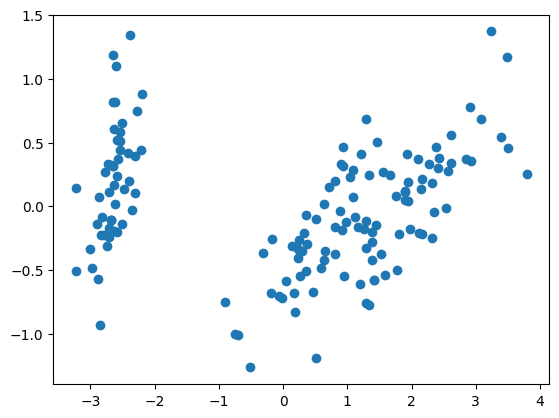

In [ ]:
# PVisualisation
import matplotlib.pyplot as plt
plt.scatter(df['pc1'],df['pc2'])
plt.show()

In [ ]:
#Ratio of the information/ variance retained by the model is 0.92 + 0.05 = 97%.
pc.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [ ]:
pc2 = PCA(0.95)
comp2 = pc2.fit_transform(x)
print(pc2.n_components_)

2


In [ ]:
comp2

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,